# det

In [2]:
for(p in c("ggplot2", "readr", "dplyr", "tidyr", "patchwork")) {
    if(!requireNamespace(p, quietly = TRUE)) {
        install.packages(p, repos = "https://cran.rstudio.com")
    }
    library(p, character.only = TRUE)
}

data <- read.csv("../data/det.csv")
head(data)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,quantization,inference_time,precision
,<chr>,<dbl>,<dbl>
1,int8,0.02491188,0.00
2,int8,0.02070999,0.00
3,int8,0.01983404,0.02
4,int8,0.02027702,0.08
5,int8,0.02009916,0.00
6,int8,0.01991391,0.00


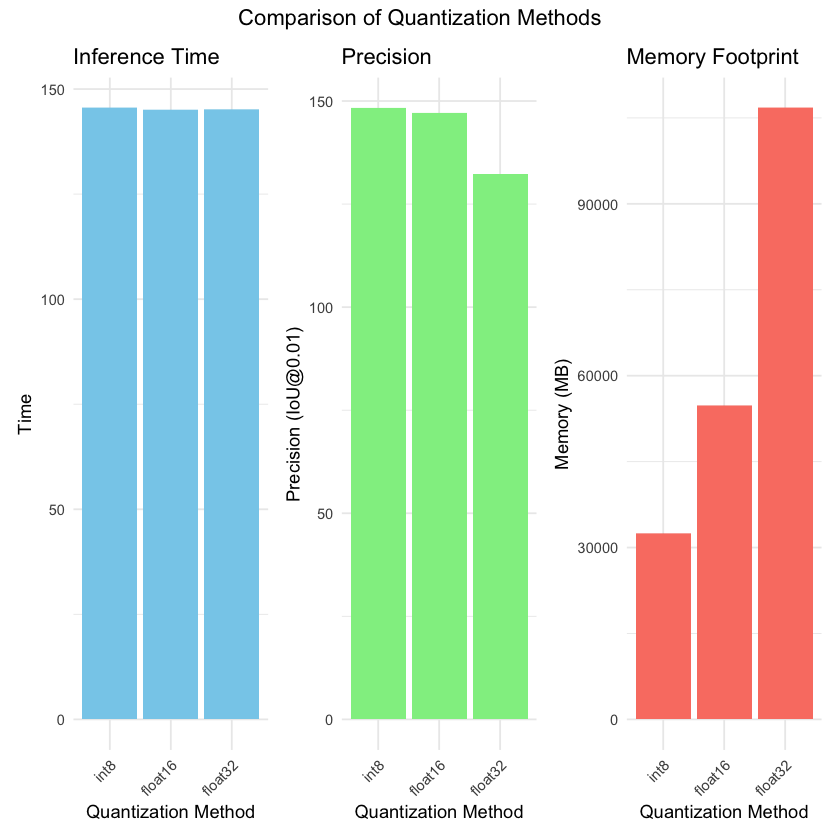

In [3]:
newdata <- data.frame(
  quantization = c("int8", "float16", "float32"),
  inference_time = data$inference_time,
  precision = data$precision,
  memory_footprint = c(7.21, 12.17, 23.72)
)

newdata <- newdata %>% arrange(quantization)

# create separate plots for each metric
plot_inference_time <- ggplot(newdata, aes(x = factor(quantization, levels = c("int8", "float16", "float32")), y = inference_time)) +
  geom_bar(stat = "identity", fill = "skyblue") +
  labs(title = "Inference Time",
       x = "Quantization Method",
       y = "Time") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

plot_precision <- ggplot(newdata, aes(x = factor(quantization, levels = c("int8", "float16", "float32")), y = precision)) +
  geom_bar(stat = "identity", fill = "lightgreen") +
  labs(title = "Precision",
       x = "Quantization Method",
       y = "Precision (IoU@0.01)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

plot_memory_footprint <- ggplot(newdata, aes(x = factor(quantization, levels = c("int8", "float16", "float32")), y = memory_footprint)) +
  geom_bar(stat = "identity", fill = "salmon") +
  labs(title = "Memory Footprint",
       x = "Quantization Method",
       y = "Memory (MB)") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# combine plots side by side
combined_plot <- plot_inference_time + plot_precision + plot_memory_footprint +
  plot_layout(ncol = 3) +
  plot_annotation(title = "Comparison of Quantization Methods",
                  theme = theme(plot.title = element_text(hjust = 0.5)))

print(combined_plot)

ggsave("../docs/assets/det-plot0.png", combined_plot, width = 15, height = 5, units = "in", dpi = 300)


In [4]:
# newdata <- data.frame(
#   quantization = c("int8", "float16", "float32"),
#   inference_time = data$inference_time,
#   precision = data$precision,
#   memory_footprint = c(7.21, 12.17, 23.72)
# )

# newdata <- newdata %>% arrange(quantization)

# data_long <- newdata %>%
#   pivot_longer(cols = c(inference_time, precision, memory_footprint),
#                names_to = "metric",
#                values_to = "value")

# ggplot(data_long, aes(x = factor(quantization, levels = c("int8", "float16", "float32")), y = value + 1e-10, fill = metric)) +
#   geom_boxplot() +
#   scale_y_log10() +
#   labs(title = "Comparison of Quantization Methods: Memory Footprint, Inference Time, and Precision",
#        x = "Quantization Method",
#        y = "Value (Log Scale)",
#        fill = "Metrics") +
#   theme_minimal() +
#   theme(legend.position = "right")

# ggsave("../docs/assets/det-plot0.png", width = 10, height = 7, units = "in", dpi = 300)

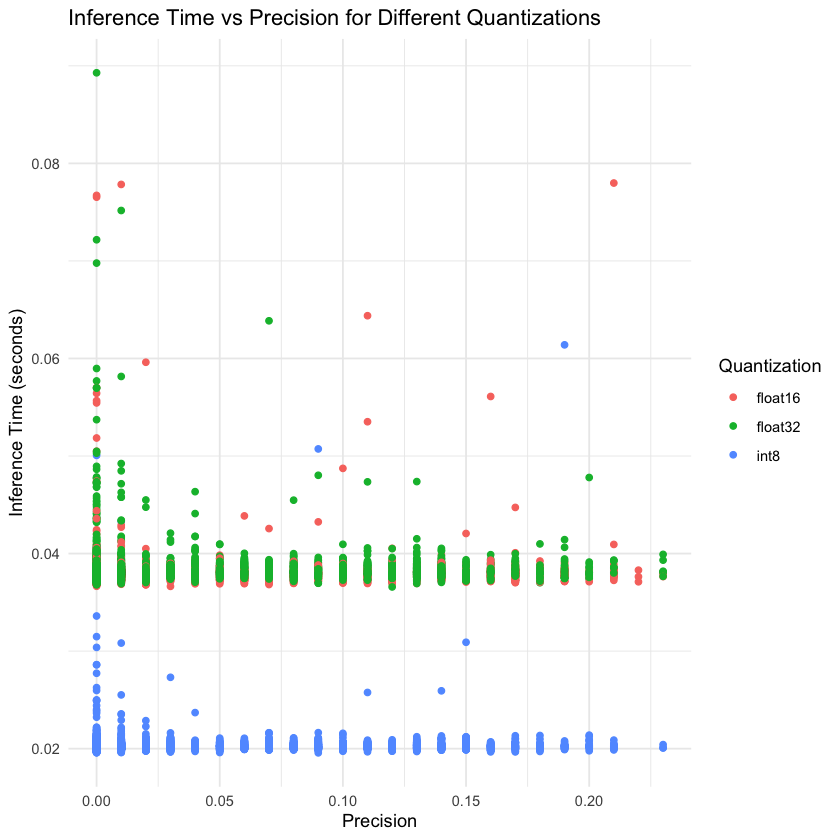

In [5]:

ggplot(data, aes(x = precision, y = inference_time, color = quantization)) +
  geom_point() +
  labs(title = "Inference Time vs Precision for Different Quantizations",
       x = "Precision",
       y = "Inference Time (seconds)",
       color = "Quantization") +
  theme_minimal()

ggsave("../docs/assets/det-plot1.png", width = 10, height = 7, units = "in", dpi = 300)

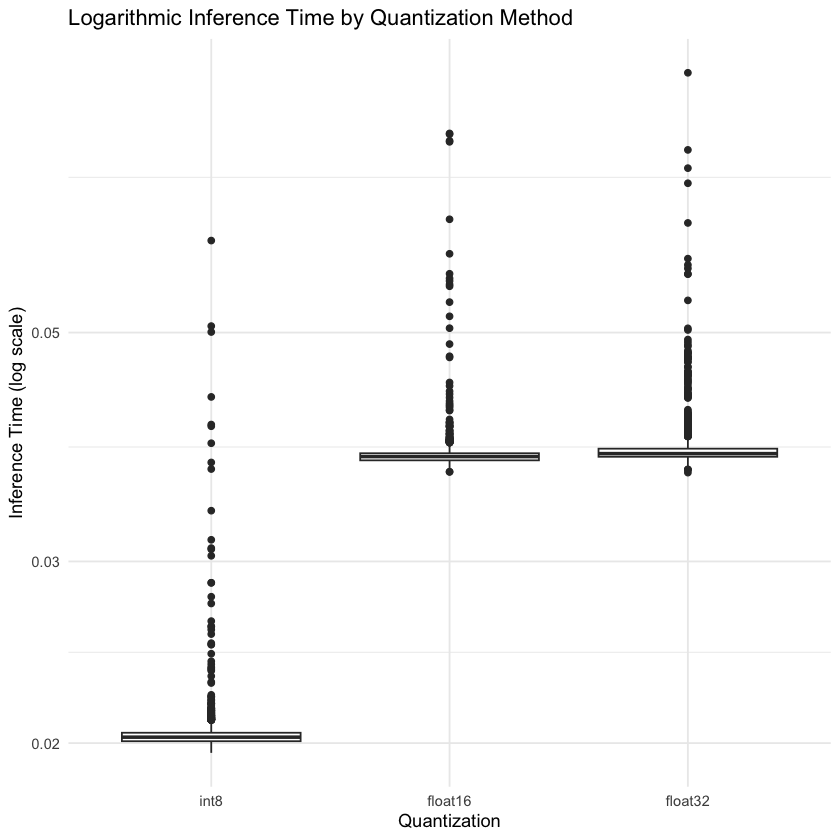

In [6]:
ggplot(data, aes(x = factor(quantization, levels = c("int8", "float16", "float32")), y = inference_time)) +
    geom_boxplot() +
    scale_y_log10() +
    labs(title = "Logarithmic Inference Time by Quantization Method",
             x = "Quantization",
             y = "Inference Time (log scale)") +
    theme_minimal()

ggsave("../docs/assets/det-plot2.png", width = 10, height = 7, units = "in", dpi = 300)

In [7]:
for (quant in unique(data$quantization)) {
  subset <- data[data$quantization == quant, ]
  correlation <- cor(subset$inference_time, subset$precision)
  print(paste("Perf correlation for", quant, ":", correlation))
}

[1] "Perf correlation for int8 : 0.0108844093522469"
[1] "Perf correlation for float16 : 0.0190346582482612"
[1] "Perf correlation for float32 : -0.0278150023864174"


# lang

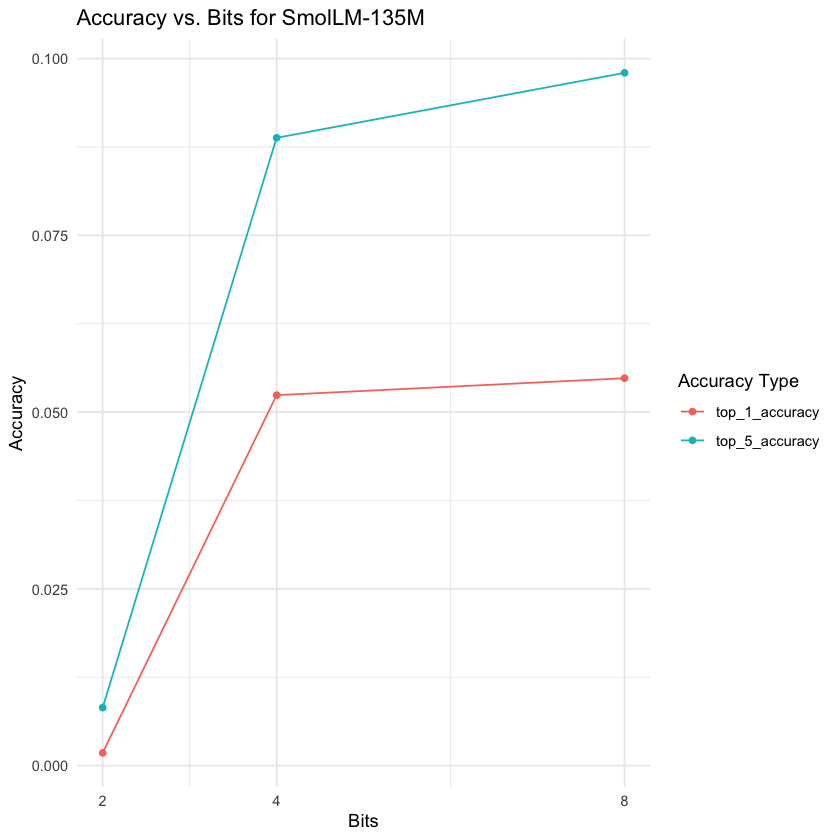

In [8]:

data <- read.csv("../data/lang.csv")

# Reshape data for plotting
accuracy_data <- data %>%
  select(bits, top_1_accuracy, top_5_accuracy) %>%
  pivot_longer(cols = c(top_1_accuracy, top_5_accuracy), 
               names_to = "accuracy_type", 
               values_to = "accuracy")

# Create the plot
ggplot(accuracy_data, aes(x = bits, y = accuracy, color = accuracy_type, group = accuracy_type)) +
  geom_line() +
  geom_point() +
  scale_x_continuous(breaks = c(2, 4, 8)) +
  labs(title = "Accuracy vs. Bits for SmolLM-135M",
       x = "Bits",
       y = "Accuracy",
       color = "Accuracy Type") +
  theme_minimal()

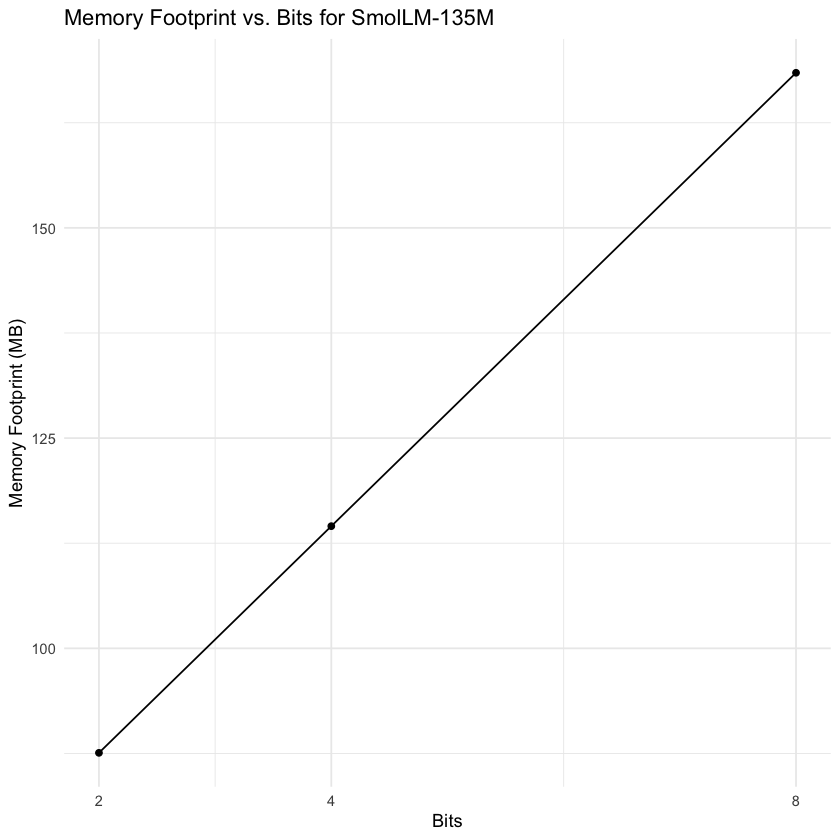

In [9]:
ggplot(data, aes(x = bits, y = memory_footprint_mb)) +
  geom_line() +
  geom_point() +
  scale_x_continuous(breaks = c(2, 4, 8)) +
  labs(title = "Memory Footprint vs. Bits for SmolLM-135M",
       x = "Bits",
       y = "Memory Footprint (MB)") +
  theme_minimal()

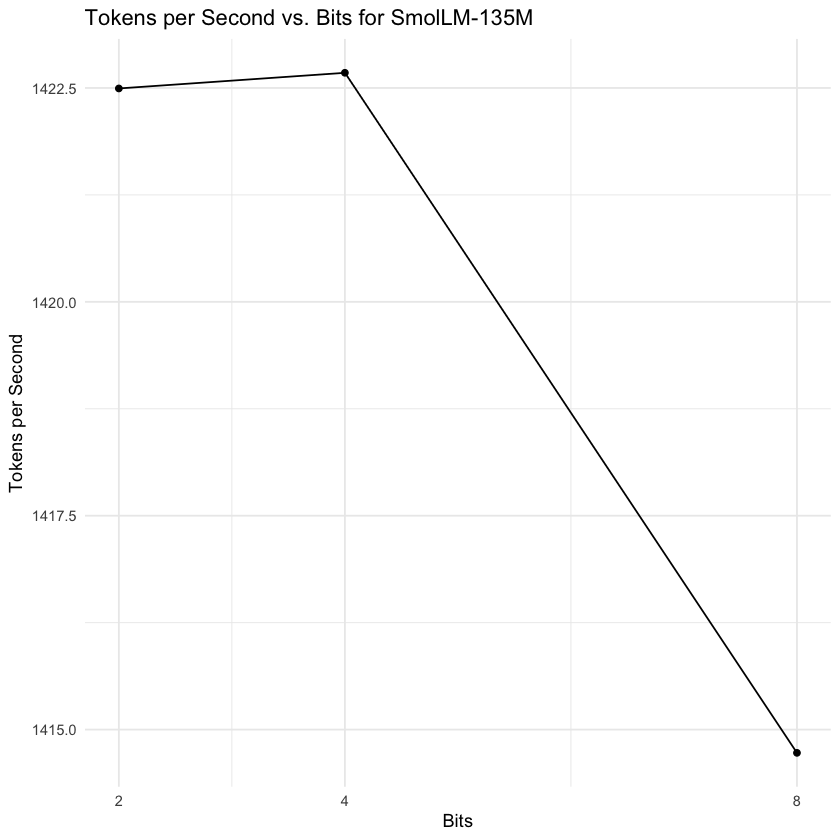

In [10]:
ggplot(data, aes(x = bits, y = tokens_per_second)) +
  geom_line() +
  geom_point() +
  scale_x_continuous(breaks = c(2, 4, 8)) +
  labs(title = "Tokens per Second vs. Bits for SmolLM-135M",
       x = "Bits",
       y = "Tokens per Second") +
  theme_minimal()